## Calling the Data Reader Class

In [ ]:
include("BBTNet/datasets/WIDERFACE.jl")
include("configs.jl")

import Random
Random.seed!(42)
d = WIDER_Data(wf_path * "train/", wf_labels_path * "train/", train=true, batch_size=batch_size, dtype=atype)
print("WIDERFACE data is read!")

## Drawing a Ground Truth Image

In [ ]:
include("./BBTNet/utils/ImageReader.jl")

train_reader = Image_Reader(true) # true for augmentation, false for only square resize

file_name = "22--Picnic/22_Picnic_Picnic_22_231.jpg"
img, bboxes = read_img(train_reader, wf_path * "train/images/" * file_name, d.bboxes[file_name], 640)
img += avg_img
print("Image file is read: ", file_name, '\n')

In [ ]:
include("./BBTNet/utils/draw.jl")
draw_boxes_and_landmarks(img, bboxes)

## Drawing Image From Manual Data

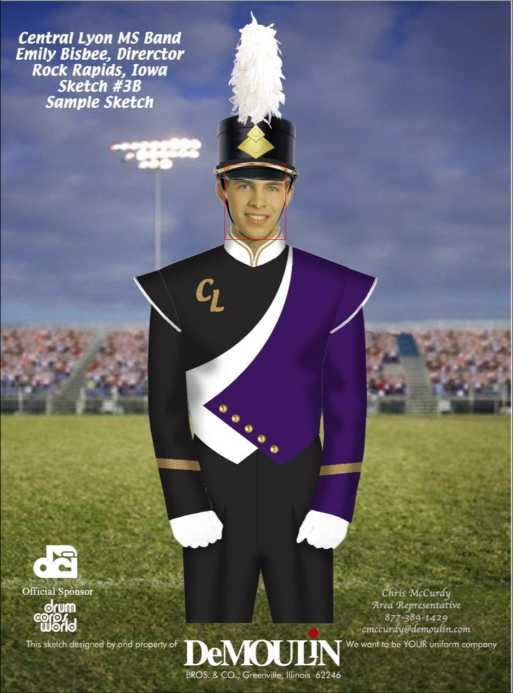

In [110]:
using Images

include("./BBTNet/utils/draw.jl")

d = reshape([449 330 571 479 488.906 373.643 542.089 376.442 515.031 412.83 485.174 425.893 538.357 431.491], (14, 1))
path = wf_path * "train/images/0--Parade/0_Parade_marchingband_1_849.jpg"

img = channelview(load(path))
draw_boxes_and_landmarks(img, d)

## Training the Model

In [80]:
include("BBTNet/models/retinaface.jl")
include("BBTNet/datasets/WIDERFACE.jl")
include("configs.jl")

import Random
Random.seed!(42)

batch_size = 2

d = WIDER_Data(wf_path * "train/", wf_labels_path * "train/", train=false, batch_size=batch_size, dtype=atype)

model = RetinaFace(dtype=atype)
print("Model is loaded!")

Model is loaded!

In [ ]:
include("BBTNet/models/retinaface.jl")
train_model(model, d, save_dir=save_dir)


--- Epoch: 1 & Batch: 0/2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

Excessive output truncated after 524288 bytes.

[97378] --> Float32[0.10786949 0.89213055]
Boxes: --> [284.15944224063463 149.91277025256824 340.0304875042461 222.08159074587076]
Landmarks: --> [313.2058886742675 175.91803677835128 311.5559399405768 176.71772129139254 313.339719940583 191.52609617204303 312.8720277860908 202.02755780428402 311.64903101600976 201.91847367239302]
[INFO] Returning results above confidence level: 0.9955.
(0, 4)(0, 10)

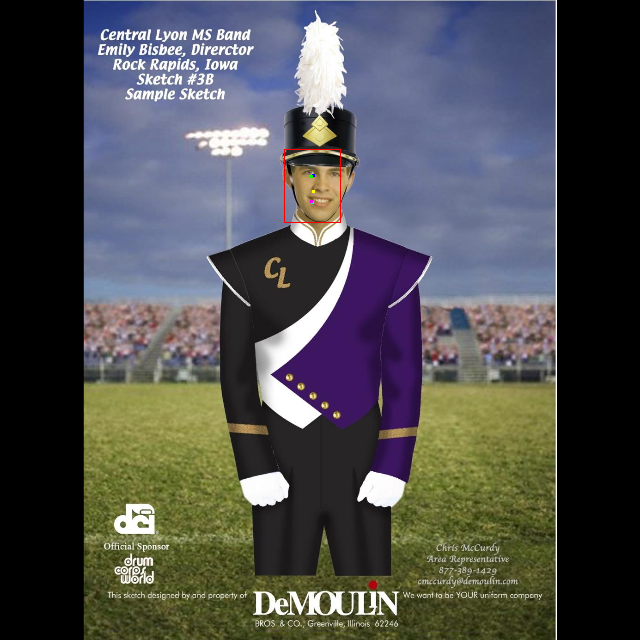

In [20]:
include("BBTNet/datasets/WIDERFACE.jl")
include("BBTNet/models/retinaface.jl")
include("./BBTNet/utils/draw.jl")
include("configs.jl")

conf_level      = 0.9955
bs = 1

dataset_path = wf_path * "train/" 
labels_path = wf_labels_path * "train/"

d = WIDER_Data(dataset_path, labels_path, train=false, batch_size=bs, dtype=atype)
img_path = d.files[1]

img, boxes = read_img(d.reader, dataset_path * "images/" * img_path, d.bboxes[img_path], img_size)
imgs = convert(atype, permutedims(reshape(img, (3, img_size, img_size, 1)), (3,2,1,4))) .* 255



model = load_model(save_dir * "model_8.jld2")
c, b, l = predict_model(model, imgs; y=boxes, mode=1) 

# b[1] = [284.15944224063463 149.91277025256824 340.0304875042461 222.08159074587076]
# l[1] = [
#     313.2058886742675 175.91803677835128 
#     311.5559399405768 176.71772129139254 
#     313.339719940583 191.52609617204303 
#     312.8720277860908 202.02755780428402 
#     311.64903101600976 201.91847367239302]

combined_pts = permutedims(Array(cat(b[1], l[1], dims=2)), (2, 1))

img += avg_img
draw_boxes_and_landmarks(img, combined_pts)

## Testing the Model

#### Testing a Batch

In [ ]:
include("BBTNet/datasets/WIDERFACE.jl")
include("BBTNet/models/retinaface.jl")
include("./BBTNet/utils/draw.jl")
include("configs.jl")

Random.seed!(42)

val_data = WIDER_Data(wf_path * "val/", wf_labels_path * "val/", train=false, batch_size=batch_size, dtype=atype)
(imgs, boxes), state = iterate(val_data)

# model = RetinaFace(dtype=atype)
model = load_model(save_dir * "model_1.jld2")
c, b, l = model(imgs, nothing, mode, false, 0)

for b in 1:batch_size
    print("For Batch Image: ", b, " found ", size(c[b],1), " proposals!\n")
end

In [ ]:
# image conversion to actual shape and cpu type for the first image in the prediction
img_no = 10
img_cpu = Array(permutedims(imgs[:,:,:,img_no], (3,2,1))) ./ 255 + avg_img
combined_pts = permutedims(Array(cat(b[img_no], l[img_no], dims=2)), (2, 1))

draw_boxes_and_landmarks(img_cpu, combined_pts)

#### Testing an Individual Image

In [4]:
include("BBTNet/datasets/WIDERFACE.jl")
# include("BBTNet/models/retinaface.jl")
include("./BBTNet/utils/draw.jl")
include("configs.jl")

sample_paths = [
    "18--Concerts/18_Concerts_Concerts_18_537.jpg", 
    "2--Demonstration/2_Demonstration_Demonstrators_2_688.jpg", 
    "0--Parade/0_Parade_Parade_0_652.jpg", 
    "55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_327.jpg"
]

dataset_path = wf_path * "train/" 
labels_path = wf_labels_path * "train/"
img_path = sample_paths[2]
# img_path = "0--Parade/0_Parade_marchingband_1_849.jpg"

d = WIDER_Data(dataset_path, labels_path, train=false, batch_size=1, dtype=atype)
img, boxes = read_img(d.reader, dataset_path * "images/" * img_path, d.bboxes[img_path], img_size)
imgs = convert(atype, permutedims(reshape(img, (3, img_size, img_size, 1)), (3,2,1,4))) .* 255

model = load_model("./weights/model_7.jld2")
c, b, l = model(imgs, nothing, mode, false, 0)


boxes = permutedims(boxes, (2, 1))
gt, pos_indices, neg_indices = encode_gt_and_get_indices(boxes, 0.5, 0.4)
print("Probabilities of boxes: ", c[1][pos_indices,1], "\n")
b[1] = b[1][pos_indices, :]
l[1] = l[1][pos_indices, :]

combined_pts = permutedims(Array(cat(b[1], l[1], dims=2)), (2, 1))

img += avg_img
draw_boxes_and_landmarks(img, combined_pts)

[15.625 131.875 69.375 118.75 209.375 317.5 371.875 435.625 509.375 553.125 604.375 616.25 629.375 626.25 617.5 572.5 549.375 393.125 498.125 594.375; 446.875 381.875 451.875 435.625 460.0 499.375 465.0 468.75 430.0 446.875 446.25 455.625 310.625 274.375 294.375 300.0 333.125 275.625 390.625 305.625; 51.875 155.0 123.75 151.875 241.25 340.625 414.375 482.5 549.375 586.875 635.625 640.0 637.5 634.375 625.625 580.0 556.875 430.0 506.25 603.75; 518.125 417.5 521.875 511.875 511.25 553.125 526.25 537.5 478.125 498.125 490.625 513.125 323.75 283.75 302.5 313.125 341.875 334.375 402.5 320.0; 44.464375000000004 126.69624999999999 104.31375 -1.0 -1.0 -1.0 386.964375 -1.0 530.2875 559.0068749999999 623.2587500000001 622.6118749999999 -1.0 -1.0 -1.0 573.515625 -1.0 410.13687500000003 -1.0 -1.0; 480.535625 391.11625 476.735625 66.875 66.875 66.875 489.609375 66.875 445.85125 466.674375 476.328125 475.306875 66.875 66.875 66.875 305.091875 66.875 295.78125 66.875 66.875; 48.92875 133.169375 118.86

In [41]:
c[1][174, :]

2-element Array{Float32,1}:
 0.19173418
 0.80826586

## Saving & Loading the Model

In [ ]:
save_model(model, save_dir * "dummy_path.jld2")

In [ ]:
model = load_model(save_dir * "model_epoch1.jld2")
print("Model is loaded from a file!\n")

## Issues on Loading ResNet50 Weights

In [ ]:
include("./BBTNet/backbones/resnet.jl")
include("./BBTNet/utils/ImageReader.jl")
include("configs.jl")

img_path = "./data/cat_img.jpg"
img = convert(atype, read_img(Image_Reader(false), img_path, nothing, img_size))
img = permutedims(reshape(img, (1, 3, img_size, img_size)), (4, 3, 2, 1)) .* 255

rn = load_mat_weights(ResNet50(dtype=atype), "./weights/imagenet-resnet-50-dag.mat")
evaluate_model(rn, img)

In [ ]:
using Knet

In [13]:
N = 3; P = 90; C = 2; thold = 0.7;

cls = softmax(randn(N, P, C), dims=3)
labels = zeros(N,P)
pos_idx = findall(cls[:,:,1] .>= thold)
neg_idx = findall(cls[:,:,2] .>= thold)

labels[pos_idx] .= 1
labels[neg_idx] .= 2

print("Parameters are set!")

Parameters are set!

In [16]:
print(cls[1,2,:], " --> ", labels[1,2])

[0.7720156825945833, 0.22798431740541678] --> 1.0

In [18]:
cls_vals = reshape(permutedims(cls, (3, 2, 1)), (2, N*P))
batch_cls = vec(permutedims(labels, (2, 1)))

print("Conversion is made!")

Conversion is made!

In [35]:
print(cls_vals[:,10], " --> ", batch_cls[10])

[0.7749085506245315, 0.22509144937546863] --> 1.0

In [36]:
for n in 1:N*P
    if cls_vals[1,n] >= thold && batch_cls[n] != 1.0
        print("In n: ", n, " --> ", cls_vals[:,n], " || ", batch_cls[n], "\n")
    elseif cls_vals[2,n] >= thold && batch_cls[n] != 2.0
        print("In n: ", n, " --> ", cls_vals[:,n], " || ", batch_cls[n], "\n")
    elseif cls_vals[1,n] < thold && cls_vals[2,n] < thold && batch_cls[n] != 0.0
        print("In n: ", n, " --> ", cls_vals[:,n], " || ", batch_cls[n], "\n")
    end
end

[13641]
Conf: --> Float32[0.014787297 0.9852126]
Boxes: --> [291.8480757191196 150.24502271176135 348.413307337521 220.68376451968396]
Landmarks: --> [309.09222717285155 171.6741683959961 334.5242332458496 173.10175094604492 322.24586486816406 187.62391357421876 308.6487106323242 197.7830047607422 331.8388931274414 199.0534240722656]
[INFO] Returning results above confidence level: 0.9.
Predicted!


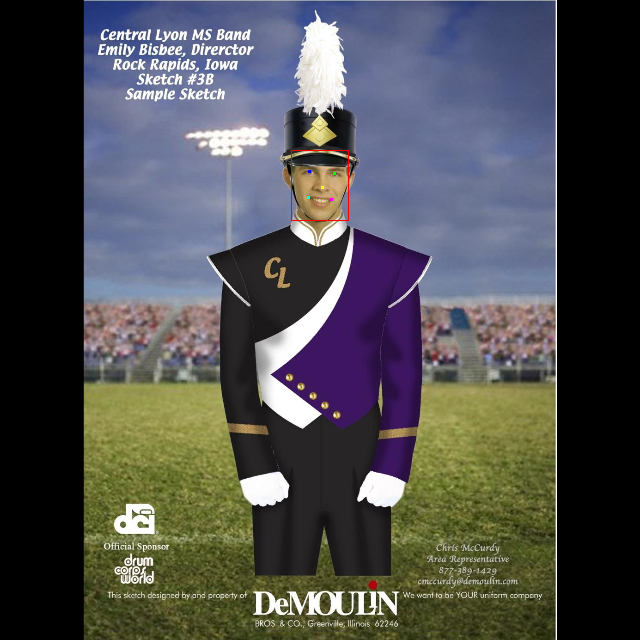

In [233]:
include("BBTNet/datasets/WIDERFACE.jl")
include("BBTNet/models/retinaface.jl")
include("BBTNet/models/pth_load_retinaface.jl")
include("./BBTNet/utils/draw.jl")
include("configs.jl")

bs = 1

dataset_path = wf_path * "train/" 
labels_path = wf_labels_path * "train/"

d = WIDER_Data(dataset_path, labels_path, train=false, batch_size=bs, dtype=atype)
img_path = d.files[1]

img, boxes = read_img(dataset_path * "images/" * img_path, img_size, boxes=d.bboxes[img_path], r=d.reader)
imgs = convert(atype, permutedims(reshape(reverse(img, dims=1), (3, img_size, img_size, 1)), (3,2,1,4)))

model = RetinaFace(dtype=atype)
model = load_pth_model(model, "./weights/Resnet50.jld"; dtype=atype)
# model = load_model("./weights/PyTorch_RetinaFace_mode2_scales3.jld2")
c, b, l = predict_model(model, imgs; y=boxes, mode=mode) 

print("Predicted!\n")

# b[1] = [291.8480757191196 150.24502271176135 348.413307337521 220.68376451968396]
# l[1] = [309.09222717285155 171.6741683959961 334.5242332458496 173.10175094604492 322.24586486816406 187.62391357421876 308.6487106323242 197.7830047607422 331.8388931274414 199.0534240722656]

combined_pts = permutedims(Array(cat(b[1], l[1], dims=2)), (2, 1))

img = convert(Array{Float32}, img .+ avg_img)
img ./= 255
draw_boxes_and_landmarks(img, combined_pts)

In [133]:
temp = rand(3, 3, 4, 2) #  W, H, C, N

temp[:,1,1,1] = [0.18859872 -0.97175736   0.80032625]
temp[:,2,1,1] = [0.24995522 -0.28208081   0.75624509]
temp[:,3,1,1] = [0.50312687  0.18073555  -0.73429254]
temp[:,1,2,1] = [-1.40248229  0.71493804  1.48990131]
temp[:,2,2,1] = [-1.00532421 -0.75790336 -0.45427835]
temp[:,3,2,1] = [ 1.4009397  -1.00062965  0.1104067 ]
temp[:,1,3,1] = [-0.23779144 -0.90851704 -0.21524735]
temp[:,2,3,1] = [-0.50608043  1.30231598 -0.83341131]
temp[:,3,3,1] = [-0.76458588  0.2590652  -2.34128338]
temp[:,1,4,1] = [ 0.0660613   0.34980801  0.74100565]
temp[:,2,4,1] = [ 0.60921997 -1.31809367 -0.22874705]
temp[:,3,4,1] = [-0.75978545 -0.0478367   1.55677707]

temp[:,1,1,2] = [-0.12419019 -1.25382296 -0.31069405]
temp[:,2,1,2] = [ 0.80901887  2.97936052 -0.22876977]
temp[:,3,1,2] = [ 0.92638754 -0.06671486 -0.1355592 ]
temp[:,1,2,2] = [-0.71868295  0.7970001   0.04280223]
temp[:,2,2,2] = [ 1.24196262 -2.19150031 -0.33539549]
temp[:,3,2,2] = [ 1.22612357  1.12919319  0.51747909]
temp[:,1,3,2] = [ 1.90781306 -0.37945301 -0.82256431]
temp[:,2,3,2] = [ 0.29703619  0.17692795 -0.29230827]
temp[:,3,3,2] = [ 1.1414713   0.95278672 -0.68337634]
temp[:,1,4,2] = [-0.79386871 -1.24048753 -0.10692337]
temp[:,2,4,2] = [ 0.21956699  0.5144575  -0.2223949 ]
temp[:,3,4,2] = [-1.0041315   1.7929808   1.18279367]

1×3 Array{Float64,2}:
 -1.00413  1.79298  1.18279

In [135]:
using Knet

size(temp)

(3, 3, 4, 2)

In [137]:
unpool(temp[:,:,1:3,:])[:,2,3,:]

6×2 Array{Float64,2}:
 -0.237791   1.90781
 -0.237791   1.90781
 -0.908517  -0.379453
 -0.908517  -0.379453
 -0.215247  -0.822564
 -0.215247  -0.822564

In [85]:
reshape(temp[:,1,:,1], (2, 6))

2×6 Array{Float64,2}:
  0.188599   0.800326  0.714938  -0.237791  -0.215247   0.349808
 -0.971757  -1.40248   1.4899    -0.908517   0.0660613  0.741006

In [131]:
temp = rand(3, 3, 4, 2) #  W, H, C, N

temp[:,1,1,1] = [0.18859872 -0.97175736   0.80032625]
temp[:,2,1,1] = [0.24995522 -0.28208081   0.75624509]
temp[:,3,1,1] = [0.50312687  0.18073555  -0.73429254]
temp[:,1,2,1] = [-1.40248229  0.71493804  1.48990131]
temp[:,2,2,1] = [-1.00532421 -0.75790336 -0.45427835]
temp[:,3,2,1] = [ 1.4009397  -1.00062965  0.1104067 ]
temp[:,1,3,1] = [-0.23779144 -0.90851704 -0.21524735]
temp[:,2,3,1] = [-0.50608043  1.30231598 -0.83341131]
temp[:,3,3,1] = [-0.76458588  0.2590652  -2.34128338]
temp[:,1,4,1] = [ 0.0660613   0.34980801  0.74100565]
temp[:,2,4,1] = [ 0.60921997 -1.31809367 -0.22874705]
temp[:,3,4,1] = [-0.75978545 -0.0478367   1.55677707]

temp[:,1,1,2] = [-0.12419019 -1.25382296 -0.31069405]
temp[:,2,1,2] = [ 0.80901887  2.97936052 -0.22876977]
temp[:,3,1,2] = [ 0.92638754 -0.06671486 -0.1355592 ]
temp[:,1,2,2] = [-0.71868295  0.7970001   0.04280223]
temp[:,2,2,2] = [ 1.24196262 -2.19150031 -0.33539549]
temp[:,3,2,2] = [ 1.22612357  1.12919319  0.51747909]
temp[:,1,3,2] = [ 1.90781306 -0.37945301 -0.82256431]
temp[:,2,3,2] = [ 0.29703619  0.17692795 -0.29230827]
temp[:,3,3,2] = [ 1.1414713   0.95278672 -0.68337634]
temp[:,1,4,2] = [-0.79386871 -1.24048753 -0.10692337]
temp[:,2,4,2] = [ 0.21956699  0.5144575  -0.2223949 ]
temp[:,3,4,2] = [-1.0041315   1.7929808   1.18279367]

# tensor([[ 0.1886, -0.9718],
#         [ 0.8003, -1.4025],
#         [ 0.7149,  1.4899],
#         [-0.2378, -0.9085],
#         [-0.2152,  0.0661],
#         [ 0.3498,  0.7410],
#         [ 0.2500, -0.2821],
#         [ 0.7562, -1.0053],
#         [-0.7579, -0.4543],
#         [-0.5061,  1.3023],
#         [-0.8334,  0.6092],
#         [-1.3181, -0.2287],
#         [ 0.5031,  0.1807],
#         [-0.7343,  1.4009],
#         [-1.0006,  0.1104],
#         [-0.7646,  0.2591],
#         [-2.3413, -0.7598],
#         [-0.0478,  1.5568]])

# W, H, C, N = size(temp); T = 2;

# res = []

# for h in 1:H
#     push!(res, reshape(temp[:,h,:,:], (2, 6, N)))
# end

# permutedims(cat(res..., dims=2), (3,2,1))

In [39]:
temp = rand(3, 3, 4, 2) #  W, H, C, N

temp[:,1,1,1] = [0.18859872 -0.97175736   0.80032625]
temp[:,2,1,1] = [0.24995522 -0.28208081   0.75624509]
temp[:,3,1,1] = [0.50312687  0.18073555  -0.73429254]
temp[:,1,2,1] = [-1.40248229  0.71493804  1.48990131]
temp[:,2,2,1] = [-1.00532421 -0.75790336 -0.45427835]
temp[:,3,2,1] = [ 1.4009397  -1.00062965  0.1104067 ]
temp[:,1,3,1] = [-0.23779144 -0.90851704 -0.21524735]
temp[:,2,3,1] = [-0.50608043  1.30231598 -0.83341131]
temp[:,3,3,1] = [-0.76458588  0.2590652  -2.34128338]
temp[:,1,4,1] = [ 0.0660613   0.34980801  0.74100565]
temp[:,2,4,1] = [ 0.60921997 -1.31809367 -0.22874705]
temp[:,3,4,1] = [-0.75978545 -0.0478367   1.55677707]

temp[:,1,1,2] = [-0.12419019 -1.25382296 -0.31069405]
temp[:,2,1,2] = [ 0.80901887  2.97936052 -0.22876977]
temp[:,3,1,2] = [ 0.92638754 -0.06671486 -0.1355592 ]
temp[:,1,2,2] = [-0.71868295  0.7970001   0.04280223]
temp[:,2,2,2] = [ 1.24196262 -2.19150031 -0.33539549]
temp[:,3,2,2] = [ 1.22612357  1.12919319  0.51747909]
temp[:,1,3,2] = [ 1.90781306 -0.37945301 -0.82256431]
temp[:,2,3,2] = [ 0.29703619  0.17692795 -0.29230827]
temp[:,3,3,2] = [ 1.1414713   0.95278672 -0.68337634]
temp[:,1,4,2] = [-0.79386871 -1.24048753 -0.10692337]
temp[:,2,4,2] = [ 0.21956699  0.5144575  -0.2223949 ]
temp[:,3,4,2] = [-1.0041315   1.7929808   1.18279367]

1×3 Array{Float64,2}:
 -1.00413  1.79298  1.18279

In [12]:
permutedims(temp, (4, 3, 2, 1))[2,3,:,:]

array([[ 1.90781306, -0.37945301, -0.82256431],
       [ 0.29703619,  0.17692795, -0.29230827],
       [ 1.1414713 ,  0.95278672, -0.68337634]])

3×3 Array{Float64,2}:
 1.90781   -0.379453  -0.822564
 0.297036   0.176928  -0.292308
 1.14147    0.952787  -0.683376

In [36]:
include("BBTNet/models/retinaface.jl")
include("BBTNet/models/pth_load_retinaface.jl")
include("configs.jl")

model = RetinaFace(dtype=atype)
model = load_pth_model(model, "./weights/Resnet50.jld"; dtype=atype)
# model = load_model("./weights/PyTorch_RetinaFace_mode2_scales3.jld2")
print("Model is loaded!")

Model is loaded!

In [40]:
par = convert(atype, temp[:,:,1:3,:])

c1, c2, c3, c4 = model.backbone(par)
print("Pass is made")

Pass is made

In [41]:
permutedims(c1, (4, 3, 2, 1))[1,1,:,:]

1×1 KnetArray{Float32,2}:
 0.012069089

In [8]:
sum(pass1)

3.5646892f0

In [192]:
include("./BBTNet/utils/ImageReader.jl")
include("configs.jl")

imgs_arr = zeros(3, img_size, img_size, 1)

img = reverse(read_img("rgb.png", img_size), dims=1) # C, H, W
imgs_arr[:,:,:,1] .= img
imgs_arr = convert(atype, permutedims(imgs_arr, (3,2,1,4)))
# imgs = permutedims(reshape(img, (3, img_size, img_size, 1)), (3,2,1,4)) # W, H, C, N
print("Img is loaded")

Img is loaded

In [228]:
include("BBTNet/models/retinaface.jl")
include("BBTNet/models/pth_load_retinaface.jl")
include("configs.jl")

model = RetinaFace(dtype=atype)
model = load_pth_model(model, "./weights/Resnet50.jld"; dtype=atype)
print("Model is loaded! \n")

c2, c3, c4, c5 = model.backbone(imgs_arr, return_intermediate=true, train=false)
p_vals = model.fpn([c2, c3, c4, c5], train=false)
c_vals = model.context_module(p_vals, train=false)
class_vals = model.cls_head2(c_vals, train=false)
bbox_vals = model.bbox_head2(c_vals, train=false)
lm_vals = model.lm_head2(c_vals, train=false)

print("Sums: ", sum(abs.(class_vals)), " & ", sum(abs.(bbox_vals)), " & ", sum(abs.(lm_vals)), "\n")

Model is loaded! 
Sums: 33600.0 & 45422.11 & 195163.1


In [220]:
N, P, T = size(class_vals)

closest_idx = []
diff = 100000
val = 0

search = 3.7373

for p in 1:P
    for t in 1:T
        if abs(class_vals[1,p,t] - search) < diff
            diff = abs(class_vals[1,p,t] - search)
            val = class_vals[1,p,t]
            closest_idx = [p, t]
        end
    end
end

print(diff, " --> ", val, " & ", closest_idx)

5.087661743008454e-6 --> 3.737295 & [10665, 1]

In [229]:
bbox_vals[1,:,:]

16800×4 KnetArray{Float32,2}:
  1.07553      1.98467   -1.45211    0.370386
  1.89568      2.82056   -1.24197    0.837686
 -0.682762     2.27343    0.18891    0.528259
  0.686733     3.97944   -0.344411   0.910914
  0.144067     1.9555     0.433249   0.178814
  0.0535518    4.22788    0.118145   0.771407
  0.246825     1.63426    0.556798  -0.15972
 -0.0935479    3.73022    0.395834   0.319011
  0.116834     1.53436    0.624061  -0.502894
  0.0968761    3.3052     0.486188  -0.0329229
  0.0201016    1.53224    0.689199  -0.519471
  0.399558     3.43272    0.540217  -0.0271447
 -0.156903     1.5626     0.692038  -0.46814
  ⋮                                 
  0.0926321   -0.831652  -0.762497  -0.598481
  0.0452882   -0.469322  -0.864691  -1.09917
  0.0722307   -0.771229  -0.756413  -0.655401
  0.0443921   -0.469494  -0.825686  -1.09386
  0.0851617   -0.714814  -0.746418  -0.624375
  0.0543142   -0.415116  -0.776424  -1.05272
  0.0928739   -0.635971  -0.761717  -0.591808
  0.0578587   -0